

# No-Show Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project analyzes a dataset of no-show appointments. The dataset includes information from 100,000 medical appointments in Brazil. Each appointment includes appointment information, age and scholarship status of the patient, where the hospital is located, pre-existing conditions the patient may have, if a text message reminder about the appointment was received, and if the patient was a no-show. In this dataset, a "No" on a no-show, means the patient showed up, while a "Yes" means they were a no-show. In columns where the value is represented by a "1" or "0", it can be concluded that "1" means true, and "0" means false.

> This project will aim to answer the correlation between age and no-show appointments, and how scholarships vs. no scholarships affects no show appointments.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Importing libraries needed to run analysis.

<a id='wrangling'></a>
# Data Wrangling

> ##### This section involves:
- Loading the no-show appointment data set.
- To become familiar with the dataset, the first 5 rows of data, data types, information, duplicates, and a description of the columns are looked at.
- Look at various visual representations of dataset.
- Filtering the data for ages 18 to 64 -- There are many variables to why a child would be a no-show to an appointment that are not covered in this dataset and could interfere with overall conclusions. A child is reliant on their parent or guardian to make an appointment. For the data analysis to be accurate, we would need to understand the age of the parent or guardian that is making the decisions for them.

> ##### The cleaning section will include:
- Creating Consistent Naming
- Altering the Patient ID to resemble an ID number
- Changing the data type of Scheduled Day, Appointment Day
- Droping columns that will not be used in this data analysis
- Alter the No Show column to be more easily understandable

### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


- Importing dataset and verifying data was loaded correctly 

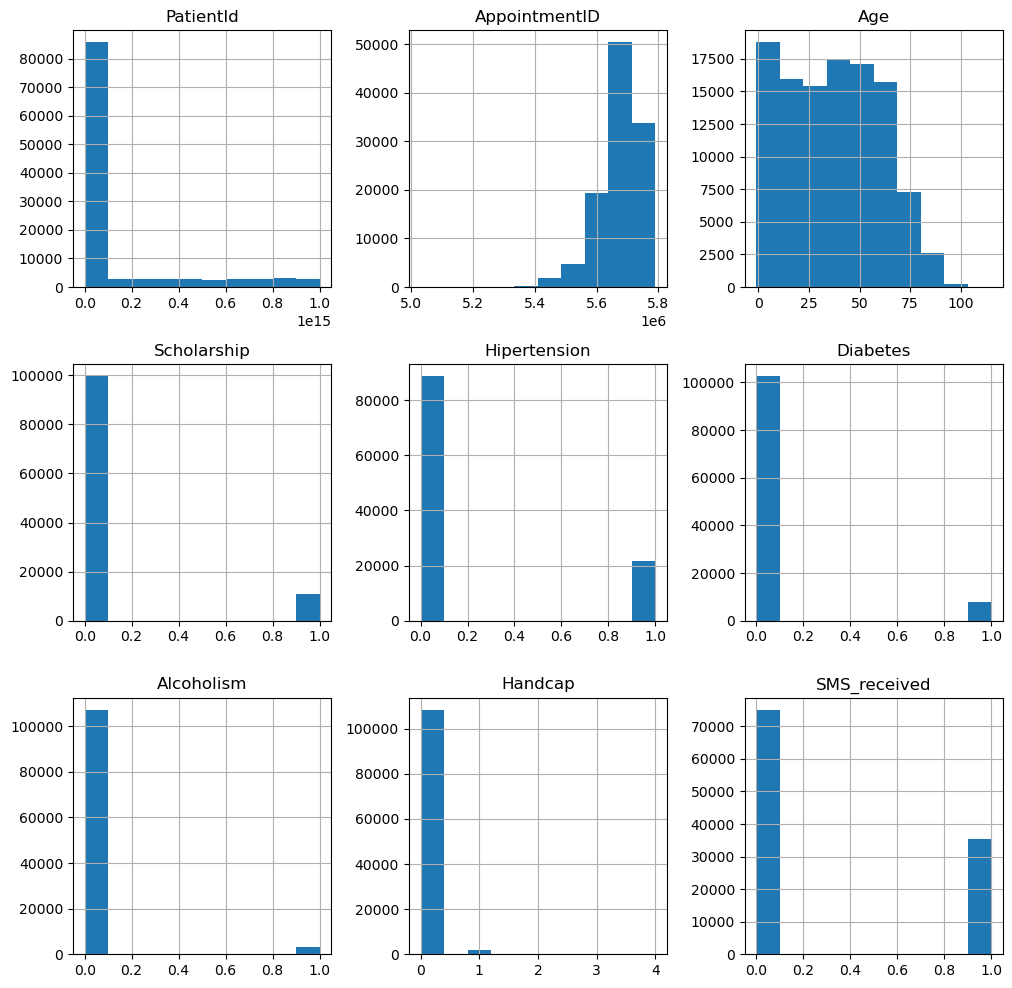

In [3]:
df.hist(figsize=(12,12));

- Looking at generalize data histograms to get an overview of the data.
- Most of the data in this dataset are based on True/False values.

In [4]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

- Looking at datatypes to see if they are appropriate for the dataset.
- I notice here that Scheduled Day and Appointment Day should more than likely become a datetime data type.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- Looking to see if any values are missing from any of the columns. No columns are missing data which is great!

In [6]:
df.duplicated().sum()

0

- Verifying that none of the rows in the data set are duplicated. There is no duplicated data which makes one less step in cleaning the data

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- Looking for trends, outliers, or any other information that might be helpful
- Interesting to see that the minimum age is -1. Filtering by age might be appropriate in this dataset.
- Will create a box plot to visualize the description of the age column

Text(0.5, 1.0, 'Distribution of Age')

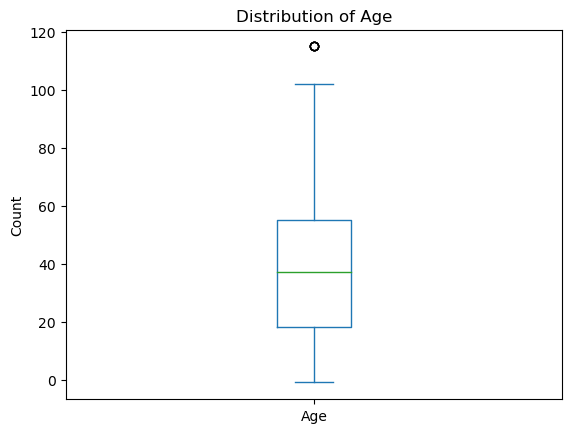

In [8]:
df['Age'].plot(kind='box')
plt.ylabel('Count')
plt.title('Distribution of Age')


- This bar chart allows the visualization of the Age column in the description in Output [7]. Ultimately choosing to only run analysis on ages 18 to 64 due to description given. Running another description after filtering by age.

In [9]:
df = df[(df['Age'] >= 18) & (df['Age'] <65)]

- Chose to filter by ages 18-64 due to information found in the description and the box plot.
- This information supplements my original idea of that there are many reasons why a person under 18 might not be able to make their appointment. A parent or guardian should be responsible for patients under 18 appointments. Under 18 no-show appointment age data might not weigh the same as those adults that are responsible for themselves.

In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,6.874500e+04,6.874500e+04,68745.000000,68745.000000,68745.000000,68745.000000,68745.000000,68745.000000,68745.000000
mean,1.471418e+14,5.675416e+06,41.214517,0.109215,0.192392,0.065881,0.043378,0.021165,0.335341
std,2.563653e+14,7.014447e+04,13.454628,0.311911,0.394182,0.248076,0.203707,0.154842,0.472113
min,3.921784e+04,5.030230e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.123471e+12,5.640236e+06,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.159882e+13,5.680430e+06,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.395988e+13,5.724990e+06,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999275e+14,5.790484e+06,64.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- Describing the data again after filtering by age.
- Removes outliers of -1 age and 115 age among others.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68745 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       68745 non-null  float64
 1   AppointmentID   68745 non-null  int64  
 2   Gender          68745 non-null  object 
 3   ScheduledDay    68745 non-null  object 
 4   AppointmentDay  68745 non-null  object 
 5   Age             68745 non-null  int64  
 6   Neighbourhood   68745 non-null  object 
 7   Scholarship     68745 non-null  int64  
 8   Hipertension    68745 non-null  int64  
 9   Diabetes        68745 non-null  int64  
 10  Alcoholism      68745 non-null  int64  
 11  Handcap         68745 non-null  int64  
 12  SMS_received    68745 non-null  int64  
 13  No-show         68745 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 7.9+ MB


- Sample size reduced to 68,745 appointments after filtering by age

In [12]:
df.nunique()

PatientId         37698
AppointmentID     68745
Gender                2
ScheduledDay      65595
AppointmentDay       27
Age                  47
Neighbourhood        80
Scholarship           2
Hipertension          2
Diabetes              2
Alcoholism            2
Handcap               5
SMS_received          2
No-show               2
dtype: int64

- Since most values are True/False, unique values should be limited to two values.
- Earlier histograms showed that column "Handcap" had more than just two values, and that is confirmed with seeing how many unique values each column has.
- "Handcap" has 5 unique values? What are they?

In [13]:
handcap_values = df['Handcap'].unique()
print(handcap_values)

[0 1 2 3 4]


- The values are numeric but we do not know what the numbers represent.
- We should find out the distribution of the values

Text(0.5, 1.0, 'Frequency of Handicap Identifiers')

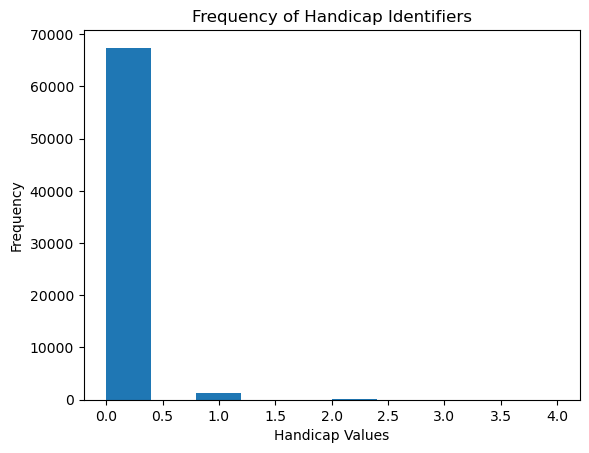

In [14]:
df['Handcap'].plot(kind='hist');
plt.xlabel('Handicap Values')
plt.title('Frequency of Handicap Identifiers')


- Visualization of the distribution of handicap values.
- Most are "0", and we can see slivers of "1" and "2", but what are the exact counts?

In [15]:
handcap_counts = df['Handcap'].value_counts()
print(handcap_counts)

0    67394
1     1254
2       91
3        5
4        1
Name: Handcap, dtype: int64


- Small amount of data that is not "0"/False or "1"/True. Could remove any entry with value of 2, 3, or 4 without significant reduction in data size.
- What do these values mean? Does a number mean handicapped or certain type of handicap?
- Since information was not given, better to remove this data from the dataset for now.

In [16]:
neighborhood_count = df['Neighbourhood'].nunique()
print(neighborhood_count)
neighborhood_values = df['Neighbourhood'].unique()
print(neighborhood_values)
value_counts = df['Neighbourhood'].value_counts()
print(value_counts)

80
['JARDIM DA PENHA' 'MATA DA PRAIA' 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA'
 'NOVA PALESTINA' 'DA PENHA' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA'
 'SÃO CRISTÓVÃO' 'TABUAZEIRO' 'MARUÍPE' 'GRANDE VITÓRIA' 'SANTO ANDRÉ'
 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ' 'JABOUR'
 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO'
 'BELA VISTA' 'PRAIA DO SUÁ' 'INHANGUETÁ' 'ITARARÉ' 'SÃO JOSÉ' 'REDENÇÃO'
 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA'
 'ARIOVALDO FAVALESSA' 'UNIVERSITÁRIO' 'SÃO BENEDITO' 'PRAIA DO CANTO'
 'CONSOLAÇÃO' 'DO MOSCOSO' 'SANTA LÚCIA' 'BARRO VERMELHO'
 'ILHA DE SANTA MARIA' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'MORADA DE CAMBURI'
 'ENSEADA DO SUÁ' 'FONTE GRANDE' 'SANTOS REIS' 'PIEDADE'
 'JESUS DE NAZARETH' 'SANTA LUÍZA' 'SANTA TEREZA' 'ROMÃO'
 'ILHA DAS CAIEIRAS' 'COMDUSA' 'VILA RUBIM' 'DE LOURDES' 'SANTA CECÍLIA'
 'JOANA D´ARC' 'JUCUTUQUARA' 'DO QUADRO' 'MONTE BELO' 'GURIGICA' 'HORTO'
 'DO CABRAL' 'SEGURANÇA DO LAR' 'CRUZAMENTO

- There are a lot of different neighborhoods. Do we want to analyze any data that uses the neighborhoods of the hospital?
- With the amount of data here, I will **not** do any analysis with the neighborhoods.

# Data Cleaning

> **Create Consistent Naming**

> **Patient ID** Get rid of scientific notation, convert to string and remove commas

> **Scheduled and Appointment Day** Change to datetime data type
 
> **Handcap** Drop column due to unknown data

> **Pre-Existing Conditions** Drop columns since they will be not use in the analysis here

> **Change No Show column** Reflect True or False and consistency with other columns

> **Create Consistent Naming**

In [17]:
change_names = {'SMS_received' : 'SMSreceived', 'No-show' : 'Show', 'Neighbourhood':'Neighborhood'}
df.rename(columns = change_names, inplace=True)

- Change column names to create a more standarized labeling
- The column for no-show appointments can be confusing, so I will rename the column and change the data so that it is more easily understandable.

In [18]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSreceived,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes


- Show that the changes to column names are now reflected in the dataset

> **Patient ID alteration**

In [19]:
pd.set_option('display.float_format', lambda x: f'{x:,.0f}')
df['PatientId'] = df['PatientId'].astype(str).str.replace(',', '')
df['PatientId'] = df['PatientId'].str.replace('.0', '', regex=False)

- Changing patient ID from scientific notation to show the entire ID like a typical ID number.
- Changing patient ID from a float to a string and removing commas.
- Changing patient ID to not show any decimal points so that they will not end in unnecessary zeros.

In [20]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSreceived,Show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
6,733688164476661,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes


- Verifying that the Patient ID did reflect the changes made.

> **Scheduled and Appointment Day data type alteration**

In [21]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

- Changing Scheduled and Appointment Day to date time as stated earlier.

In [22]:
df['AppointmentID'] = df['AppointmentID'].astype(str)

- Changing Appointment ID to a string since the numbers do not need to be altered as an integer or a float

> **Showing changed data types for previous alterations**

In [23]:
df.dtypes

PatientId                      object
AppointmentID                  object
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighborhood                   object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMSreceived                     int64
Show                           object
dtype: object

- Verifying that the datatypes changed for Scheduled Day, Appointment Day, and Appointment ID.

> **Dropping unnecessary columns**

In [24]:
df = df.drop(columns=['Handcap', 'Hipertension', 'Diabetes', 'Alcoholism'])

- This data analysis will not use the Handcap, Hipertension, Diabetes, or Alcoholism columns.
- Removing the data will reduce the clutter of the dataset since it will not be used.

In [25]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,SMSreceived,Show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,No
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,Yes


- Verifying that the columns were dropped.

In [26]:
df.describe()

,Age,Scholarship,SMSreceived
count,"68,745","68,745","68,745"
mean,41,0,0
std,13,0,0
min,18,0,0
25%,30,0,0
50%,41,0,0
75%,53,0,1
max,64,1,1


- Describing the data again to see what has changed.
- We now only see descriptions for Age, Scholarship, and SMS received.
- The only column that provides useful data is the Age column.

> **Alter No Show column to be more easily understable**

In [27]:
df['Show'] = df['Show'].apply(lambda x: 1 if x == 'No' else 0)

- Altering the No-Show column to become more easily understandable.
- Instead of having to flip "Yes" and "No" in our minds, they are flipped and changed to "True" and "False" Values.
- Will now be able to understand as, "Did this patient show up for their appointment?", "True/False", "True" meaning Yes and "False" meaning no.
- This also provides consistency between other True/False columns.

In [28]:
df.dtypes

PatientId                      object
AppointmentID                  object
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighborhood                   object
Scholarship                     int64
SMSreceived                     int64
Show                            int64
dtype: object

- Showing that the "Show" column is now represented as an integer since the values are "0" or "1".

In [29]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,SMSreceived,Show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,1
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,1
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,1
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0


- Verifying that the "Show" column is now represented by "0" and "1", just as "Scholarship" and "SMSreceived" columns are.

<a id='eda'></a>
# Exploratory Data Analysis


## What is the correlation, if any, of age to no-show appointments?

**Grouping information by Age and if Showed Up**

Text(0.5, 1.0, 'Frequency of Age after filtering for ages 18-64')

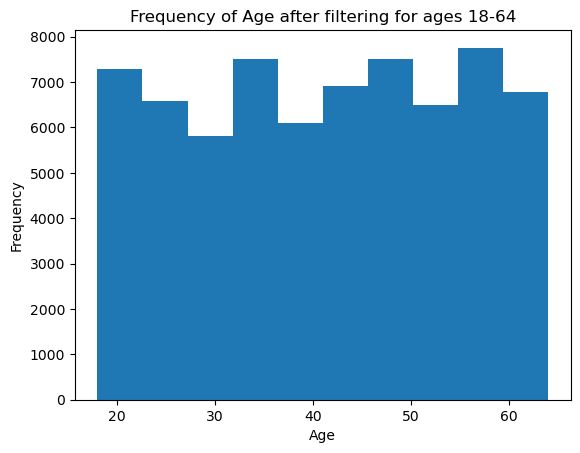

In [30]:
df['Age'].plot(kind='hist')
plt.xlabel('Age')
plt.title('Frequency of Age after filtering for ages 18-64')


- There are less outliers now that the data has been filted to 18-64.
- The bulk of the data involves ages 18-64 and this shows the counts for these ages.

In [31]:
grouped = df.groupby('Age')['Show'].value_counts(normalize=True) * 100
grouped = grouped.reset_index(name='Percentage')
print(grouped)

    Age  Show  Percentage
0    18     1          76
1    18     0          24
2    19     1          74
3    19     0          26
4    20     1          75
..  ...   ...         ...
89   62     0          16
90   63     1          87
91   63     0          13
92   64     1          86
93   64     0          14

[94 rows x 3 columns]


- Grouping the Age column by the Show column.
- Divides each age by if they showed up or not and the percentage representation of those numbers.

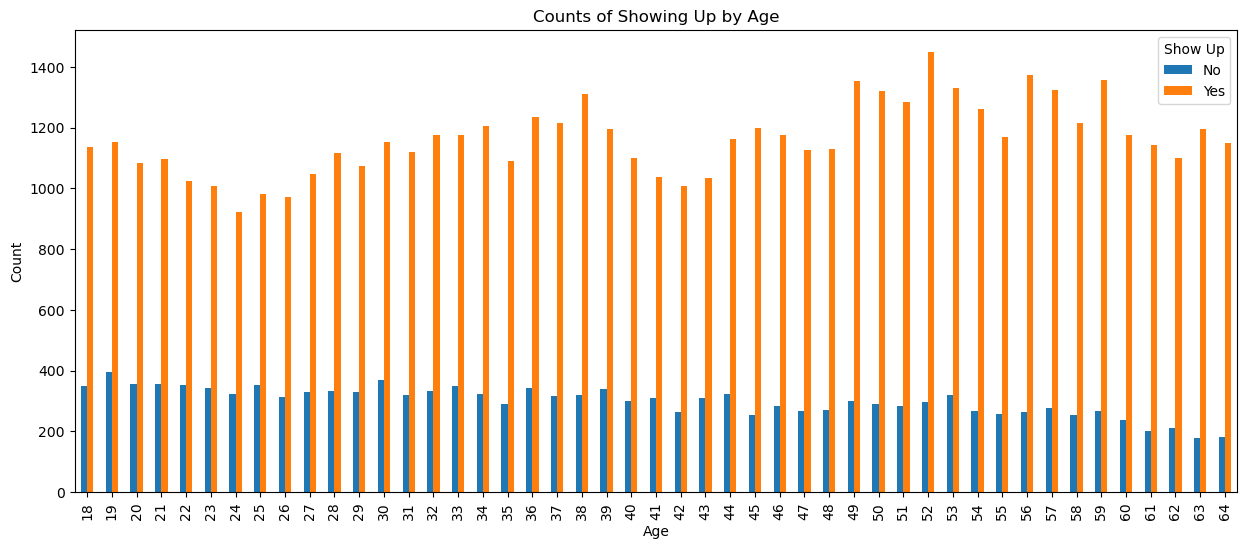

In [32]:
grouped_data = df.groupby(['Age', 'Show']).size().unstack()
grouped_data.plot(kind='bar', figsize=(15, 6))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Counts of Showing Up by Age')
plt.legend(loc='upper right', title='Show Up', labels=('No', 'Yes'))
plt.show()

- Visualization of the information from Output[32]. 
- More often than not, patients are keeping their appointments across all ages.

**Percentages of showing up by ages**

In [33]:
yes_count = df[df['Show'] == 1].groupby('Age').size()
no_count = df[df['Show'] == 0].groupby('Age').size()
yes_no_count_difference = no_count - yes_count
yes_percentage = yes_count / (yes_count + no_count) * 100
no_percentage = no_count / (yes_count + no_count) * 100
print(no_percentage)

Age
18   24
19   26
20   25
21   24
22   26
23   25
24   26
25   26
26   24
27   24
28   23
29   24
30   24
31   22
32   22
33   23
34   21
35   21
36   22
37   21
38   20
39   22
40   21
41   23
42   21
43   23
44   22
45   18
46   19
47   19
48   19
49   18
50   18
51   18
52   17
53   19
54   18
55   18
56   16
57   17
58   17
59   16
60   17
61   15
62   16
63   13
64   14
dtype: float64


- Can see the counts of each age and the no-show appointments.
- Can better see a correlation with a scatterplot, so let's run that next.

Text(0.5, 1.0, 'Percentage of No Show by Age')

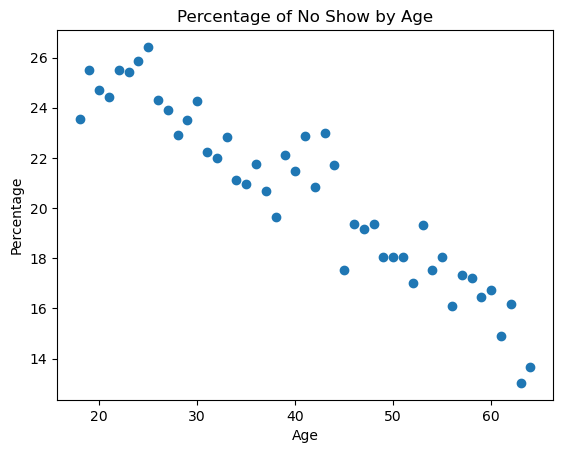

In [34]:
plt.scatter(no_percentage.index, no_percentage.values)
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Percentage of No Show by Age')

- The scatterplot visualizes the data from Output[33].
- Possible correlation with increasing age and declining no show appointments.

## What percent of those with scholarships show up?

In [35]:
scholarship_count = df['Scholarship'].value_counts()
print(scholarship_count)

0    61237
1     7508
Name: Scholarship, dtype: int64


- Showing the counts of patients with scholarships vs. those without scholarships.
- "0" is no scholarship, "1" is scholarship. 
- Much less with scholarship than without.

Text(0.5, 1.0, 'Frequency of Scholarship recipients')

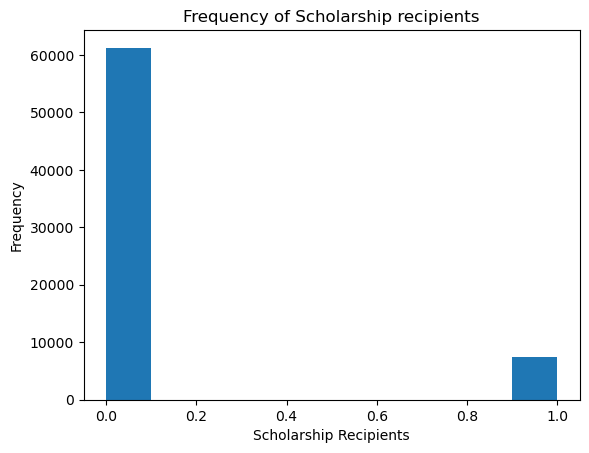

In [36]:
df['Scholarship'].plot(kind='hist');
plt.xlabel('Scholarship Recipients')
plt.title('Frequency of Scholarship recipients')


- Visualizes data from Output[36].
- There are significantly more patients without scholarship than with. 
- Filtering by those with scholarships should make the data set much smaller.

### **Filter information by only those with a Scholarship**

In [37]:
df_scholarship = df[(df['Scholarship'] == 1)]
df_scholarship.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,SMSreceived,Show
12,566654781423437,5634718,F,2016-04-28 11:33:51+00:00,2016-04-29 00:00:00+00:00,22,NOVA PALESTINA,1,0,1
17,14794966191172,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0
18,17135378245248,5621836,F,2016-04-26 10:54:18+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,1,1,1
33,7653516999712,5616921,F,2016-04-25 15:01:04+00:00,2016-04-29 00:00:00+00:00,38,SÃO CRISTÓVÃO,1,1,1
37,1578131861739,5637986,F,2016-04-29 07:35:56+00:00,2016-04-29 00:00:00+00:00,64,TABUAZEIRO,1,0,1


- Filter the data by only those who receive scholarships.
- Verify that the dataset only shows scholarship recipients.

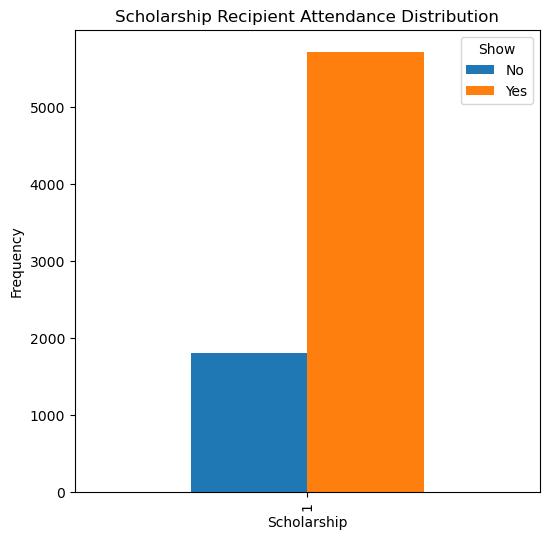

In [38]:
grouped_scholarship = df_scholarship.groupby(['Scholarship', 'Show']).size().unstack()
grouped_scholarship.plot(kind='bar', figsize=(6, 6))
plt.ylabel('Frequency')
plt.title('Scholarship Recipient Attendance Distribution')
plt.legend(loc='upper right', title='Show', labels=('No', 'Yes'))

- Visualizing the amount of show/no-show appointments of those with scholarships.
- Many more patients show up than do not show up.
- Let's see the actual counts.

In [39]:
print(grouped_scholarship)

Show            0     1
Scholarship            
1            1798  5710


- The actual counts of show/no-show of those with scholarships.
- Just as the visualization shows, more patients show up than do not show up.

In [40]:
yes_show = df_scholarship[(df_scholarship['Show'] == 1)].groupby('Scholarship').size()
no_show = df_scholarship[(df_scholarship['Show'] == 0)].groupby('Scholarship').size()
total_show = yes_show + no_show
yes_percentage = yes_show / (total_show) * 100
no_percentage = no_show / (total_show) * 100

- Getting the percentage of the show/no-show patients with scholarships to be able to make a pie chart of the values. 

<Axes: title={'center': 'Percentage of patients with Scholarships showing up'}, ylabel='Show'>

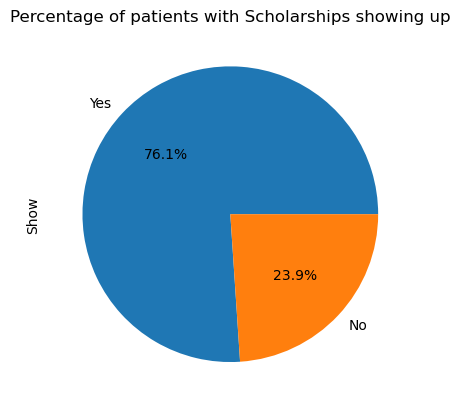

In [41]:
labels = ['Yes', 'No']
df_scholarship['Show'].value_counts().plot(kind='pie', labels=labels, title='Percentage of patients with Scholarships showing up', autopct='%1.1f%%')


- Pie chart of the percentages found in Input[40].
- 76.1% of those with scholarships show up to their appointments and 23.9% do not.
- Patients with scholarships are more likely to show up than not.
- How does this compare to patients without scholarships?

**Filter information by only those without a Scholarship**

In [42]:
df_no_scholarship = df[(df['Scholarship'] == 0)]
df_no_scholarship.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,SMSreceived,Show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,1
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,1
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,1
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0


- Looking for the same information for no scholarships patients as scholarship patients.
- Filter the data by only those who do not receive scholarships.
- Verify that the dataset only shows non-scholarship recipients.

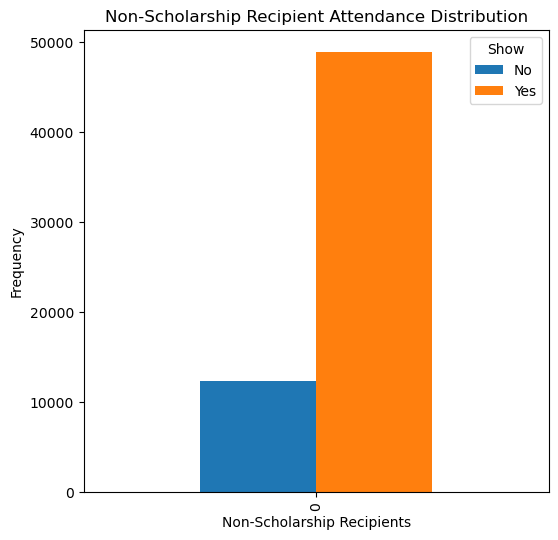

In [43]:
grouped_no_scholarship = df_no_scholarship.groupby(['Scholarship', 'Show']).size().unstack()
grouped_no_scholarship.plot(kind='bar', figsize=(6, 6))
plt.ylabel('Frequency')
plt.xlabel('Non-Scholarship Recipients')
plt.title('Non-Scholarship Recipient Attendance Distribution')
plt.legend(loc='upper right', title='Show', labels=('No', 'Yes'))

- Visualizing the amount of show/no-show appointments of those without scholarships.
- Many more patients show up than do not show up.
- Let's see the actual counts.

In [44]:
print(grouped_no_scholarship)

Show             0      1
Scholarship              
0            12291  48946


- The actual counts of show/no-show of those without scholarships.
- Just as the visualization shows, more patients show up than do not show up.

In [45]:
yes_show = df_no_scholarship[(df_no_scholarship['Show'] == 1)].groupby('Scholarship').size()
no_show = df_no_scholarship[(df_no_scholarship['Show'] == 0)].groupby('Scholarship').size()
total_show = yes_show + no_show
yes_percentage = yes_show / (total_show) * 100
no_percentage = no_show / (total_show) * 100

- Getting the percentage of the show/no-show patients without scholarships to be able to make a pie chart of the values. 

<Axes: title={'center': 'Percentage of those without Scholarships showing up'}, ylabel='Show'>

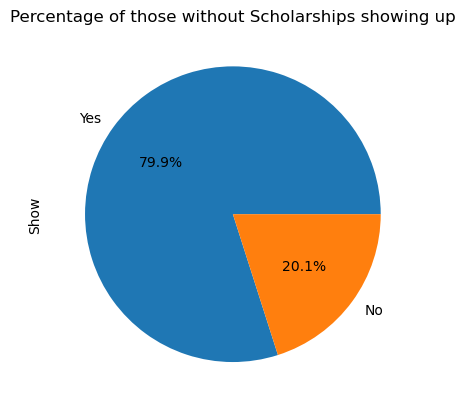

In [46]:
labels = ['Yes', 'No']
df_no_scholarship['Show'].value_counts().plot(kind='pie', labels=labels, title='Percentage of those without Scholarships showing up', autopct='%1.1f%%')

- Pie chart of the percentages found in Input[45].
- 79.9% of those with scholarships show up to their appointments and 20.1% do not.
- Patients without scholarships are more likely to show up than not.
- There is not much of a difference between those with scholarships and without scholarships showing up or not.

<a id='conclusions'></a>
## Conclusions

> **What is the correlation, if any, of age to no-show appointments?**

>> The scatter plot, "Percentage of No Show by Age", shows correlation between increased age and lower events of no show appointments in ages 18 to 64.

> **What percent of those with scholarships show up to their appointments?**

>> The pie chart, "Percentage of those with Scholarships showing up", shows that 76.1% of those with scholarships show up to their appointment. The pie chart, "Percentage of those without Scholarships showing up", shows that 79.9% of those without scholarships show up. There seems to be no correlation of those with scholarships showing up more than those without.

>**Limitations**

>> Limitations of this data include:
>>- Ambiguity of some of the columns. The Handicap column indicated that there were 5 choices just represented by numbers. There was no key to what the numbers meant, thus making any data using these possibly unreliable in meaning.
>>- Cultural difference. This dataset is from Brazil, which is a country where there may be cultural differences regarding age that can influence the data. I am personally not informed of customary actions taken in Brazil, which could lead to innapropriate data filtering.
>>- Multiple appointments from same patient. There were instances where a single patient had made multiple appointments. I wondered if these were appointments for the same issue, or appointments set for different reasons. The possibilities overwhelmed me and led me away from trying to explore the possibilities within that data.